In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# 函数的参数在上篇文章中已经介绍，此处不再赘述。
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, 
                      low_memory=False, infer_datetime_format=True, engine='c',
                      parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [16]:
dataset.shape

(2075259, 7)

In [17]:
dataset.replace('?', np.nan, inplace=True) # 替换异常值
dataset = dataset.astype('float32') # 统一数据类型为float类型，提高精度和速度

In [18]:
def fill_missing(values):
    '''
    该函数实现缺失值填充
    思路：将前一天同一时刻的采样值用来填充缺失值
    '''
    one_day = 60 * 24
    for row in range(values.shape[0]):# 行循环
        for col in range(values.shape[1]): # 列循环
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

fill_missing(dataset.values) # 填充缺失值

In [20]:
# 添加剩余用电量的列，计算公式已经在前一篇文章中解释过，此处不赘述。
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
dataset.to_csv('household_power_consumption.csv')

In [21]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, 
                   infer_datetime_format=True, engine='c',
                   parse_dates=['datetime'], index_col=['datetime'])

In [41]:
daily_groups = dataset.resample('D')
daily_groups.count()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,396,396,396,396,396,396,396,396
2006-12-17,1440,1440,1440,1440,1440,1440,1440,1440
2006-12-18,1440,1440,1440,1440,1440,1440,1440,1440
2006-12-19,1440,1440,1440,1440,1440,1440,1440,1440
2006-12-20,1440,1440,1440,1440,1440,1440,1440,1440
...,...,...,...,...,...,...,...,...
2010-11-22,1440,1440,1440,1440,1440,1440,1440,1440
2010-11-23,1440,1440,1440,1440,1440,1440,1440,1440
2010-11-24,1440,1440,1440,1440,1440,1440,1440,1440


In [42]:
daily_groups.sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664


In [43]:
daily_data = daily_groups.sum()

In [45]:
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664


In [46]:
daily_data.to_csv('household_power_consumption_days.csv')

In [47]:
def evaluate_forecasts(actual, predicted):
    '''
    该函数实现模型评估
    思路：统计所有单日预测的 RMSE
    '''
    for i in range(actual.shape[1]):
        mse = skm.mean_squared_error(actual[:i], predicted[:,i])
        rmse = math.sqrt(mse)
        
        scores.append(rmse)
        
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col]) ** 2
    score = math.sqrt(s / (actual.shape[0] * actual.shape[1]))
    
    return score, scores

In [54]:
daily_data.iloc[daily_data.index == '2010-01-03']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2010-01-03,2083.454,191.61,350992.12,8703.6,3842.0,4920.0,10074.0,15888.233356


In [55]:
daily_data.iloc[daily_data.index == '2010-11-20']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2010-11-20,2197.006,153.768,346476.0,9320.2,4367.0,2947.0,11433.0,17869.76664


In [56]:
daily_data.iloc[daily_data.index == '2006-12-17']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-17,3390.46,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732


In [57]:
daily_data.iloc[daily_data.index == '2010-01-02']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2010-01-02,1309.268,199.546,352332.84,5489.8,801.0,298.0,6425.0,14297.133407


In [63]:
daily_data[1:-328]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
2006-12-21,1723.288,144.434,347096.41,7266.4,1765.0,2692.0,10456.0,13808.466697
...,...,...,...,...,...,...,...,...
2009-12-29,2047.968,242.050,350183.54,8514.2,1260.0,346.0,10205.0,22321.800005
2009-12-30,2451.110,266.794,347115.21,10322.6,5284.0,4539.0,12484.0,18544.833400
2009-12-31,2211.892,186.612,346980.70,9218.4,0.0,387.0,19409.0,17068.866652


actual.shape[0]:46, actual.shape[1]:7
daily: [511.886] 452.9, 596.4, 532.1, 490.5, 534.3, 481.5, 482.0

actual.shape[0]:46, actual.shape[1]:7
weekly: [469.389] 567.6, 500.3, 411.2, 466.1, 471.9, 358.3, 482.0

actual.shape[0]:46, actual.shape[1]:7
week-oya: [465.294] 550.0, 446.7, 398.6, 487.0, 459.3, 313.5, 555.1



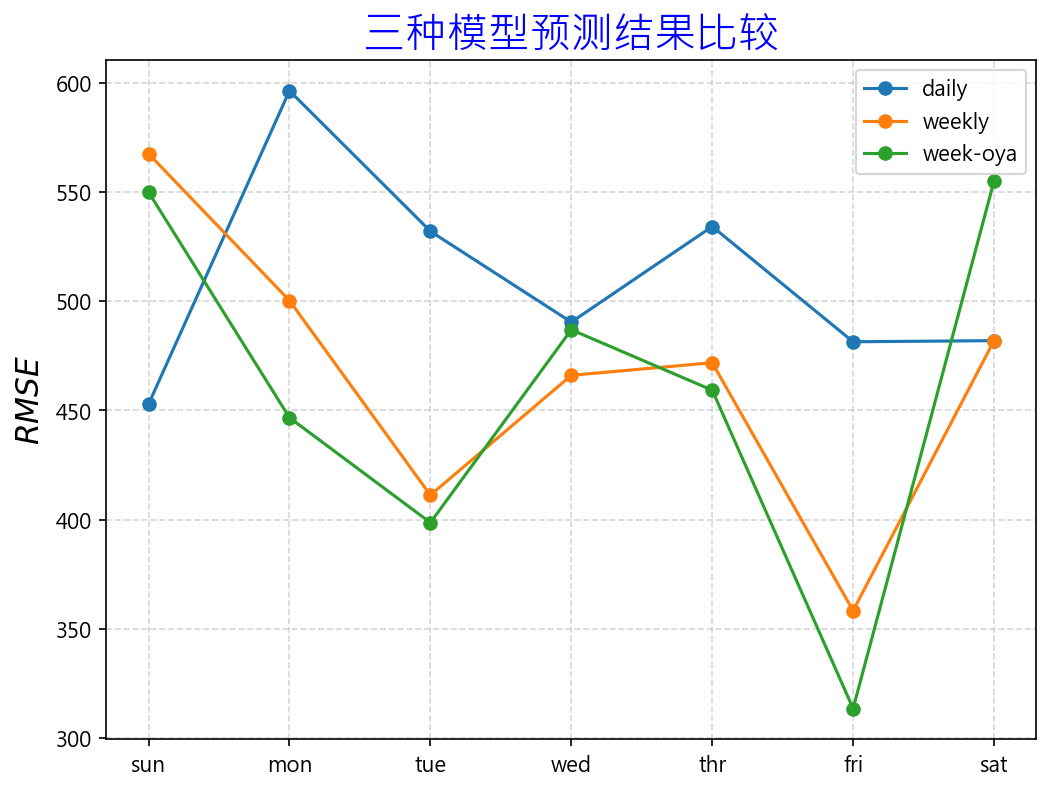

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.metrics as skm

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

def split_dataset(data):
    '''
    该函数实现以周为单位切分训练数据和测试数据
    '''
    # data为按天的耗电量统计数据，shape为(1442, 8)
    # 测试集取最后一年的46周（322天）数据，剩下的159周（1113天）数据为训练集，以下的切片实现此功能。
    train, test = data[1:-328], data[-328:-6]
    train = np.array(np.split(train, len(train)/7)) # 将数据划分为按周为单位的数据
    test = np.array(np.split(test, len(test)/7))
    return train, test

def evaluate_forecasts(actual, predicted):
    '''
    该函数实现根据预期值评估一个或多个周预测损失
    思路：统计所有单日预测的 RMSE
    '''
    scores = list()
    for i in range(actual.shape[1]):
        mse = skm.mean_squared_error(actual[:, i], predicted[:, i])
        rmse = math.sqrt(mse)
        scores.append(rmse)
    
    s = 0 # 计算总的 RMSE
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col]) ** 2
    score = math.sqrt(s / (actual.shape[0] * actual.shape[1]))
    print('actual.shape[0]:{}, actual.shape[1]:{}'.format(actual.shape[0], actual.shape[1]))
    return score, scores

def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s\n' % (name, score, s_scores))

def evaluate_model(model_func, train, test):
    '''
    该函数实现评估单个模型
    '''
    history = [x for x in train] # # 以周为单位的数据列表
    predictions = [] # 每周的前项预测值
    for i in range(len(test)):
        yhat_sequence = model_func(history) # 预测每周的耗电量
        predictions.append(yhat_sequence)
        history.append(test[i, :]) # 将测试数据中的采样值添加到history列表，以便预测下周的用电量
    predictions = np.array(predictions)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions) # 评估一周中每天的预测损失
    return score, scores

def daily_persistence(history):
    last_week = history[-1] # 获取之前一周七天的总有功功率
    value = last_week[-1, 0] # 获取前一周最后一天的总有功功率
    forecast = [value for _ in range(7)] # 准备7天预测
    return forecast

def weekly_persistence(history):
    last_week = history[-1] # 将之前一周的数据作为预测数据
    return last_week[:, 0]

def week_one_year_ago_persistence(history):
    last_week = history[-52] # 将去年同一周的数据预测数据
    return last_week[:, 0]


def model_predict_plot(dataset, days):
    train, test = split_dataset(dataset.values)
    #定义要评估的模型的名称和函数
    models = dict()
    models['daily'] = daily_persistence
    models['weekly'] = weekly_persistence
    models['week-oya'] = week_one_year_ago_persistence
    
    plt.figure(figsize=(8,6), dpi=150)
    for name, func in models.items():
        score, scores = evaluate_model(func, train, test)
        summarize_scores(name, score, scores)
        plt.plot(days, scores, marker='o', label=name)
    plt.grid(linestyle='--', alpha=0.5)
    plt.ylabel(r'$RMSE$', size=15)
    plt.title('三种模型预测结果比较', color='blue', size=20)
    plt.legend()
    plt.show()

if __name__ == '__main__':
    dataset = pd.read_csv('household_power_consumption_days.csv', header=0, 
                       infer_datetime_format=True, engine='c',
                       parse_dates=['datetime'], index_col=['datetime'])
    days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
    model_predict_plot(dataset, days)